In [11]:
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Exploring
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve
import sklearn.linear_model as reg
import split_scale
%matplotlib inline

pd.options.display.float_format = '{:20,.2f}'.format

import acquire
import summarize
import prepare


In [3]:
#regression warmup
import pydataset as data

In [65]:
data.data('faithful', show_doc=True)
df = data.data('faithful')
df.head()

faithful

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Old Faithful Geyser Data

### Description

Waiting time between eruptions and the duration of the eruption for the Old
Faithful geyser in Yellowstone National Park, Wyoming, USA.

### Usage

    faithful

### Format

A data frame with 272 observations on 2 variables.

[,1]

eruptions

numeric

Eruption time in mins

[,2]

waiting

numeric

Waiting time to next eruption (in mins)

### Details

A closer look at `faithful$eruptions` reveals that these are heavily rounded
times originally in seconds, where multiples of 5 are more frequent than
expected under non-human measurement. For a better version of the eruption
times, see the example below.

There are many versions of this dataset around: Azzalini and Bowman (1990) use
a more complete version.

### Source

W. Härdle.

### References

Härdle, W. (1991) _Smoothing Techniques with Implementation in S_. New York:
Springer.

Azzalini, A. 

,eruptions,waiting
1,3.60,79
2,1.80,54
3,3.33,74
4,2.28,62
5,4.53,85


In [67]:
stats.pearsonr(df.eruptions,df.waiting)
df.corr()

,eruptions,waiting
eruptions,1.00,0.90
waiting,0.90,1.00


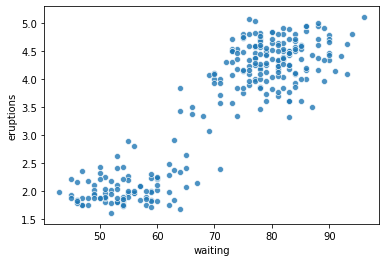

In [70]:
sns.scatterplot(y = 'eruptions', x = 'waiting',data = df, alpha = .8)

In [10]:
model = reg.LinearRegression()

In [77]:
train, test = split_scale.split_my_data(df)
# X must be a dataframe, y is a series
model.fit(train[['waiting']], train.eruptions)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
df['predicted'] = model.predict(df[['waiting']])

In [79]:
df.head()

,eruptions,waiting,predicted
1,3.60,79,4.08
2,1.80,54,2.19
3,3.33,74,3.70
4,2.28,62,2.79
5,4.53,85,4.53


In [82]:
melted_df = pd.melt(df, id_vars = 'waiting', value_vars=['eruptions', 'predicted'], )
melted_df.head()

,waiting,variable,value
0,79,eruptions,3.60
1,54,eruptions,1.80
2,74,eruptions,3.33
3,62,eruptions,2.28
4,85,eruptions,4.53


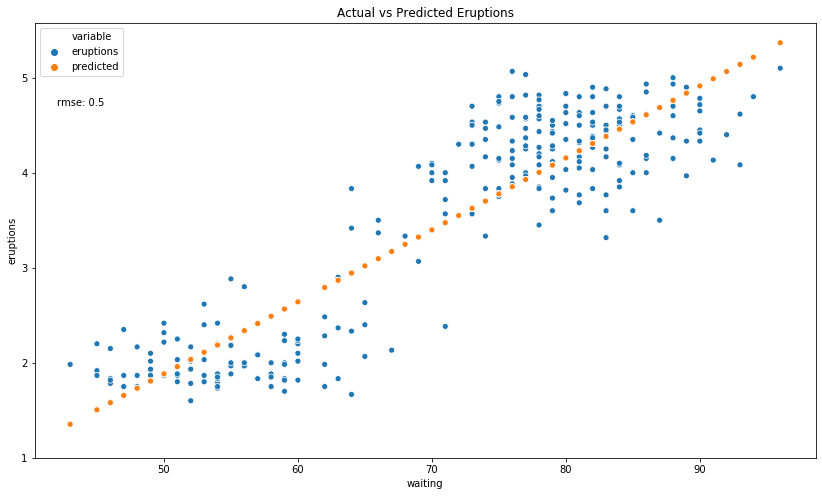

In [98]:
plt.figure(figsize=(14,8))
sns.scatterplot('waiting', 'value',data= melted_df, hue = 'variable')
plt.title('Actual vs Predicted Eruptions')
plt.yticks(ticks= [1,2,3,4,5])
plt.ylabel('eruptions')
mse = ((df.eruptions - df.predicted)**2).sum()/df.shape[0]
rmse = round(mse**(1/2), 2)
plt.annotate(s = f'rmse: {rmse}', xy= (42,4.7))
plt.show()